# ❤️ Investigação de Fatores Cardíacos

### 📌 Objetivo da Análise

Explorar os principais fatores associados a doenças cardíacas no dataset, identificando padrões e relações entre variáveis como idade, pressão arterial e colesterol, para revelar insights acionáveis que possam orientar estratégias de prevenção e modelagem preditiva futura.

### 🤔 Por que este projeto?

Doenças cardíacas são uma das maiores causas de mortalidade global, tornando a análise de seus fatores de risco relevante e impactante. Este projeto destaca habilidades analíticas avançadas e pensamento estratégico em um domínio de saúde real.

### 🎯 Meta ao Final 

Entregar um EDA visualmente claro, tecnicamente robusto e narrativamente envolvente, que não só compreenda os dados, mas também sugira como eles podem influenciar soluções práticas, como feature engineering para machine learning, sem implementá-lo.

## 📚 0. Importando Bibliotecas

In [9]:
# Importing essential libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn default style for better visualizations
sns.set()

## 📖 1. Leitura de Dados

In [11]:
# Loading the Heart Disease dataset
df = pd.read_csv("HeartDiseaseTrain-Test.csv")

In [12]:
# Checking the dataset dimensions (rows, columns)
df.shape

(1025, 14)

In [13]:
# Displaying the first 10 rows of the dataset
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
5,58,Female,Typical angina,100,248,Lower than 120 mg/ml,Normal,122,No,1.0,Flat,Zero,Fixed Defect,1
6,58,Male,Typical angina,114,318,Lower than 120 mg/ml,Left ventricular hypertrophy,140,No,4.4,Upsloping,Three,Normal,0
7,55,Male,Typical angina,160,289,Lower than 120 mg/ml,Normal,145,Yes,0.8,Flat,One,Reversable Defect,0
8,46,Male,Typical angina,120,249,Lower than 120 mg/ml,Normal,144,No,0.8,Downsloping,Zero,Reversable Defect,0
9,54,Male,Typical angina,122,286,Lower than 120 mg/ml,Normal,116,Yes,3.2,Flat,Two,Fixed Defect,0


In [14]:
# Displaying information about the dataset (data types, non-null counts, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

A principio conseguimos perceber algumas coisas logo de cara:

1. Dataset completo, sem valores ausentes, simplificando a etapa de limpeza inicial.
2. Oito colunas categóricas (object) requerem conversão ou codificação para análises quantitativas.
3. Coluna 'target' sugere classificação (ex.: presença/ausência de doença cardíaca), a ser confirmada para guiar análises.

_Mix de numéricas e categóricas será explorado com colunas transformadas adicionais para análises combinadas._

## 🧹 2. Limpeza de Dados

O dataset não contém valores nulos, mas exige verificação de duplicatas e possíveis dados inconsistentes ou 'quebrados'.

In [18]:
# Checking for duplicated rows
duplicate_count = df.duplicated().sum()

Resultado revela alta duplicação (acima de 70% das entradas), sugerindo dados válidos, porém com potencial de enviesar modelos de machine learning, como regressões ou classificadores sensíveis a redundâncias.

In [20]:
# Checking unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}: {df[col].unique()}")


sex: ['Male' 'Female']

chest_pain_type: ['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']

fasting_blood_sugar: ['Lower than 120 mg/ml' 'Greater than 120 mg/ml']

rest_ecg: ['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy']

exercise_induced_angina: ['No' 'Yes']

slope: ['Downsloping' 'Upsloping' 'Flat']

vessels_colored_by_flourosopy: ['Two' 'Zero' 'One' 'Three' 'Four']

thalassemia: ['Reversable Defect' 'Fixed Defect' 'Normal' 'No']


#### As variáveis Categóricas não apresentam valores inconsistentes, vamos verificar as numéricas

In [22]:
# Generating statistical summary of numerical variables
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


Todas as colunas numéricas apresentam valores positivos, conforme esperado, já que medidas como pressão arterial ou colesterol não admitem negativos por sua natureza física. Mesmo com duplicatas, os valores mostram consistência, sugerindo confiabilidade inicial dos dados. 

Para aprofundar análises e insights, propomos:

1. Dividir o dataset em dois: um com duplicatas (df_raw) e outro sem (df_unique).
2. Converter variáveis categóricas em numéricas, criando colunas adicionais para preservar comparações.
3. Comparar gráficos e análises lado a lado, destacando padrões e impactos das duplicatas.

Vamos separar em dois dataframes agora com e sem duplicatas, mantendo o encoding:

In [25]:
# Handling duplicates by creating two versions of the dataset
df_raw = df.copy()  # Original data with duplicates
df_unique = df.drop_duplicates()  # Data without duplicates
print(f"Original duplicates: {df_raw.duplicated().sum()}\nUnique duplicates: {df_unique.duplicated().sum()}")

Original duplicates: 723
Unique duplicates: 0


Duplicadas separadas, vamos testar a visualização lado a lado antes de prosseguir:

In [27]:
# Function to automatically encode categorical variables into numerical ones
def auto_encoder(df):
    df_encoded = df.copy()  # Ensure we're working with a copy
    categorical_columns = df_encoded.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        encoded_column = f"{column}_encoded"
        # Create a mapping of unique values to indices
        mapping = {val: idx for idx, val in enumerate(df_encoded[column].unique())}
        # Apply mapping and ensure numeric type
        df_encoded[encoded_column] = df_encoded[column].map(mapping).astype(int)
    return df_encoded

# Applying the encoding function to both datasets
df_raw = auto_encoder(df.copy())
df_unique = auto_encoder(df.drop_duplicates())

# Displaying info of the unique dataset after encoding
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    302 non-null    int64  
 1   sex                                    302 non-null    object 
 2   chest_pain_type                        302 non-null    object 
 3   resting_blood_pressure                 302 non-null    int64  
 4   cholestoral                            302 non-null    int64  
 5   fasting_blood_sugar                    302 non-null    object 
 6   rest_ecg                               302 non-null    object 
 7   Max_heart_rate                         302 non-null    int64  
 8   exercise_induced_angina                302 non-null    object 
 9   oldpeak                                302 non-null    float64
 10  slope                                  302 non-null    object 
 11  vessels_col

A encodificação das variáveis categóricas foi realizada com sucesso. Elas foram mantidas para mapeamento e possível utilização no parâmetro `hue`para entender melhor os dados.

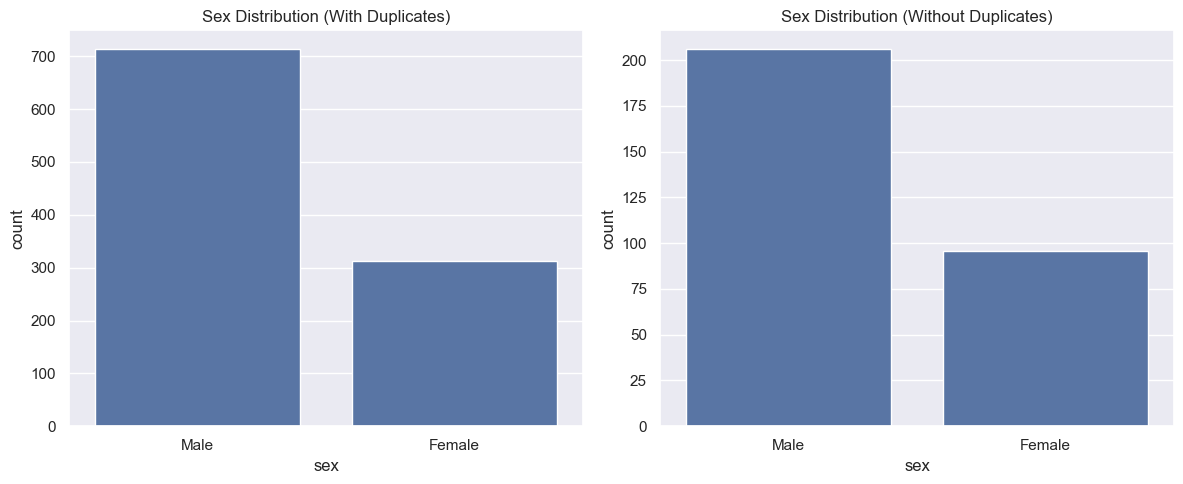

In [29]:
# Creating side-by-side count plots for 'sex'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='sex', data=df_raw)
plt.title('Sex Distribution (With Duplicates)')
plt.subplot(1, 2, 2)
sns.countplot(x='sex', data=df_unique)
plt.title('Sex Distribution (Without Duplicates)')
plt.tight_layout()
plt.show()

As visualizações mostram que a distribuição não é drasticamente alterada pelas duplicatas, mas comparações lado a lado entre os datasets com e sem duplicatas revelam diferenças sutis nos padrões.

## 🔎 3. Análise Univariada

Visualizamos um gráfico de distribuição para o sexo. Vamos visualizar os dados estatísticos de algumas variáveis que têm potencial de ser bem impactante:

In [33]:
# Comparing statistical summaries of selected columns
print("With duplicates:")
print(df_raw[['age', 'resting_blood_pressure', 'cholestoral']].describe())
print("Without duplicates:")
print(df_unique[['age', 'resting_blood_pressure', 'cholestoral']].describe())

With duplicates:
               age  resting_blood_pressure  cholestoral
count  1025.000000             1025.000000   1025.00000
mean     54.434146              131.611707    246.00000
std       9.072290               17.516718     51.59251
min      29.000000               94.000000    126.00000
25%      48.000000              120.000000    211.00000
50%      56.000000              130.000000    240.00000
75%      61.000000              140.000000    275.00000
max      77.000000              200.000000    564.00000
Without duplicates:
             age  resting_blood_pressure  cholestoral
count  302.00000              302.000000   302.000000
mean    54.42053              131.602649   246.500000
std      9.04797               17.563394    51.753489
min     29.00000               94.000000   126.000000
25%     48.00000              120.000000   211.000000
50%     55.50000              130.000000   240.500000
75%     61.00000              140.000000   274.750000
max     77.00000           

As diferenças entre os datasets (com e sem duplicatas) parecem sutis, com médias e erros padrão próximos. Gráficos univariados serão usados para confirmar isso.

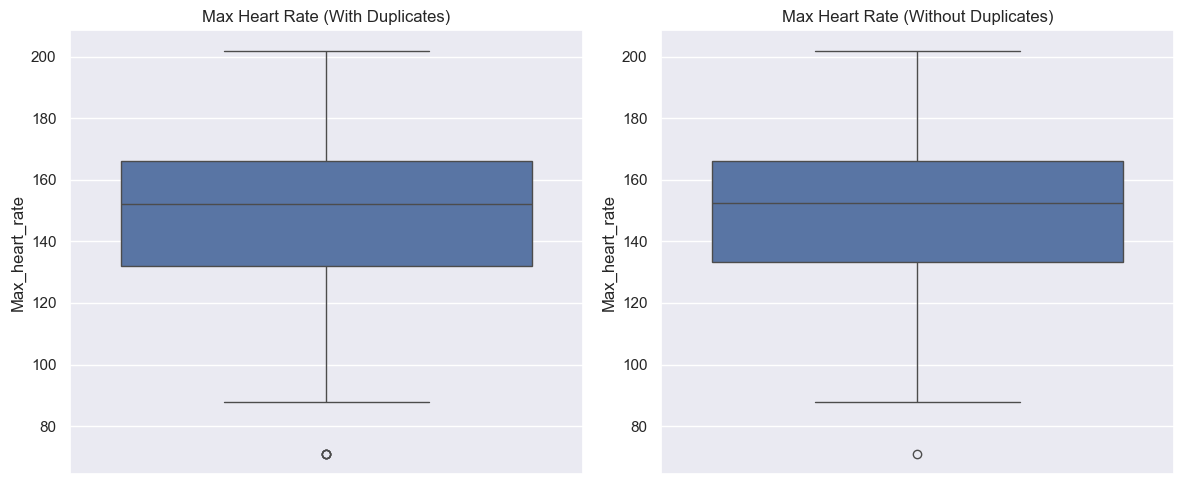

In [35]:
# Creating side-by-side boxplots for Max_heart_rate
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_raw['Max_heart_rate'])
plt.title('Max Heart Rate (With Duplicates)')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_unique['Max_heart_rate'])
plt.title('Max Heart Rate (Without Duplicates)')
plt.tight_layout()
plt.show()

O boxplot indica outliers consistentes em ambos os datasets, mas com menos frequência sem duplicatas.

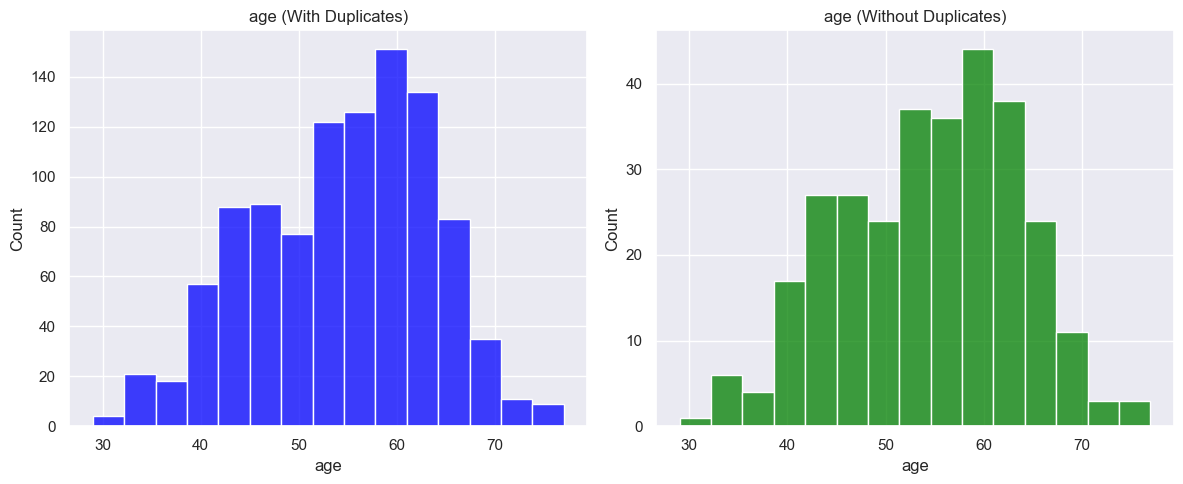

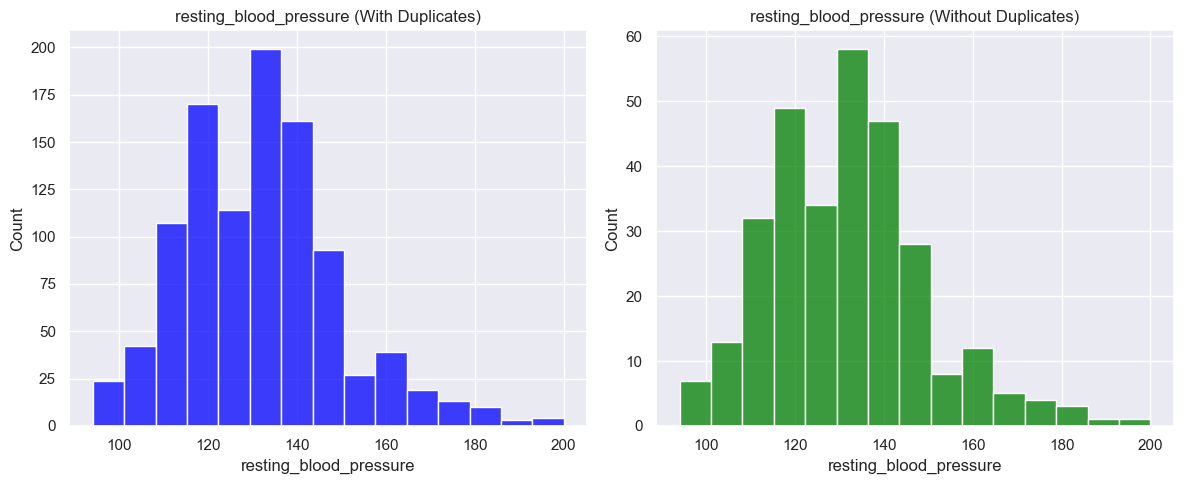

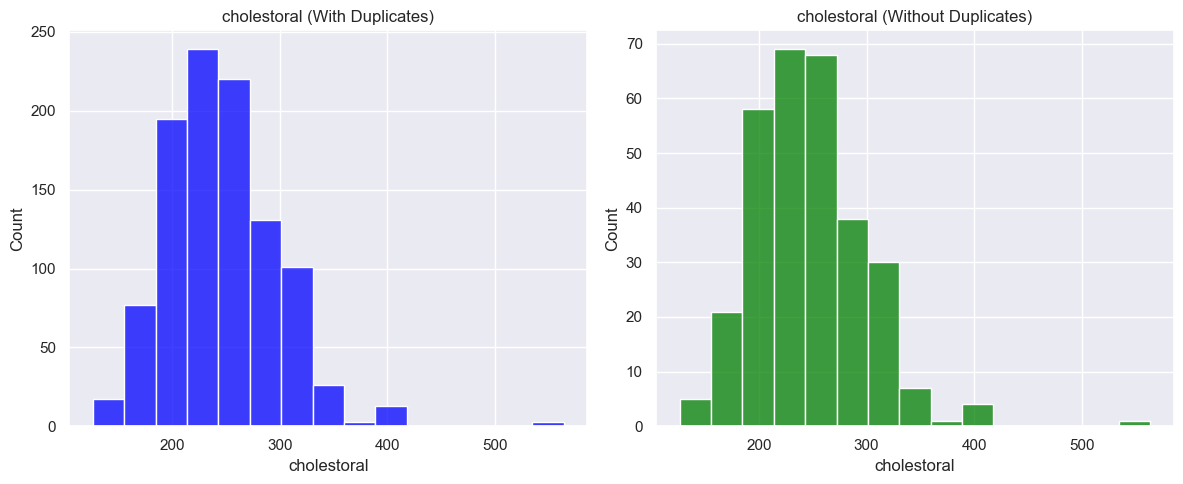

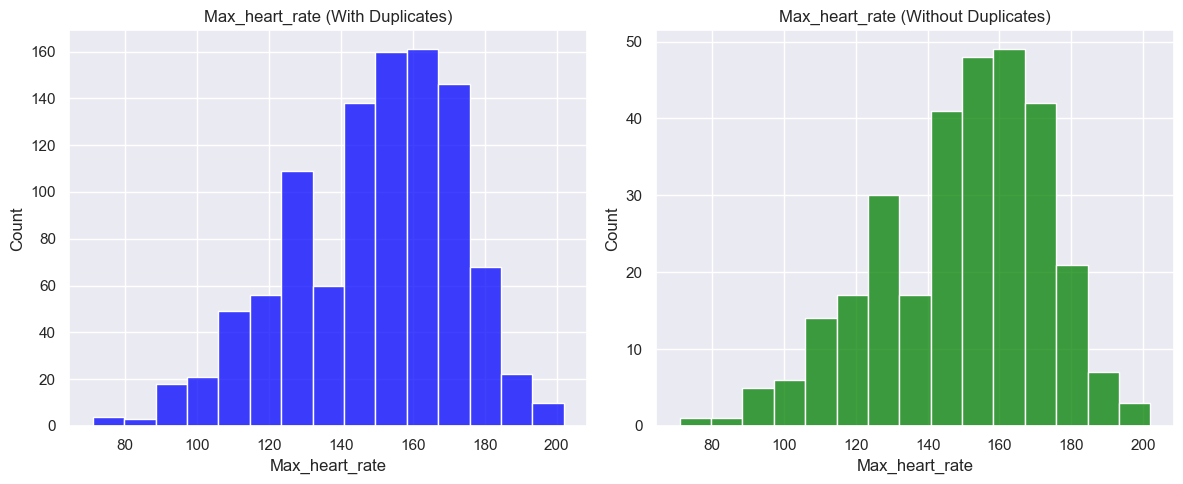

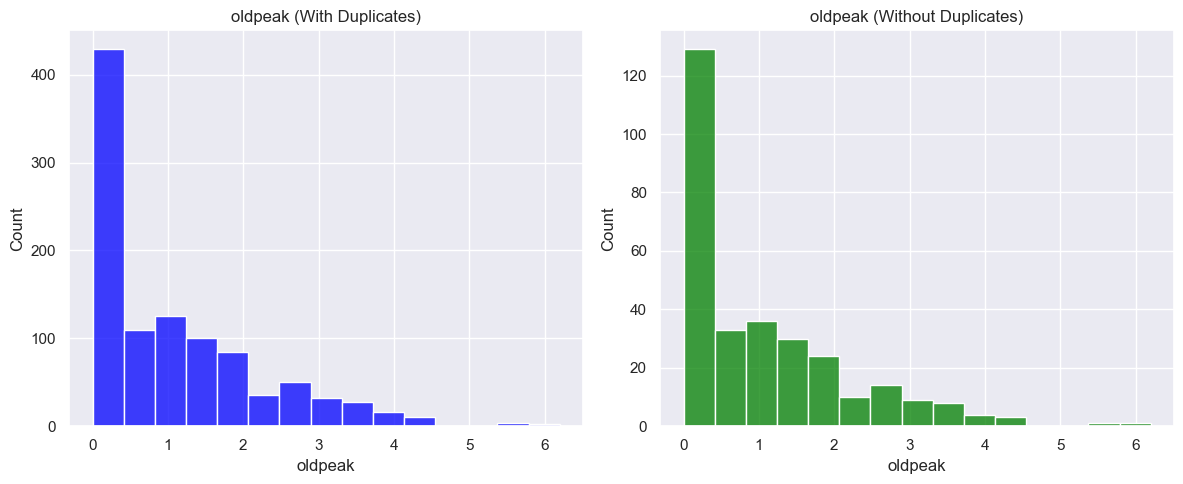

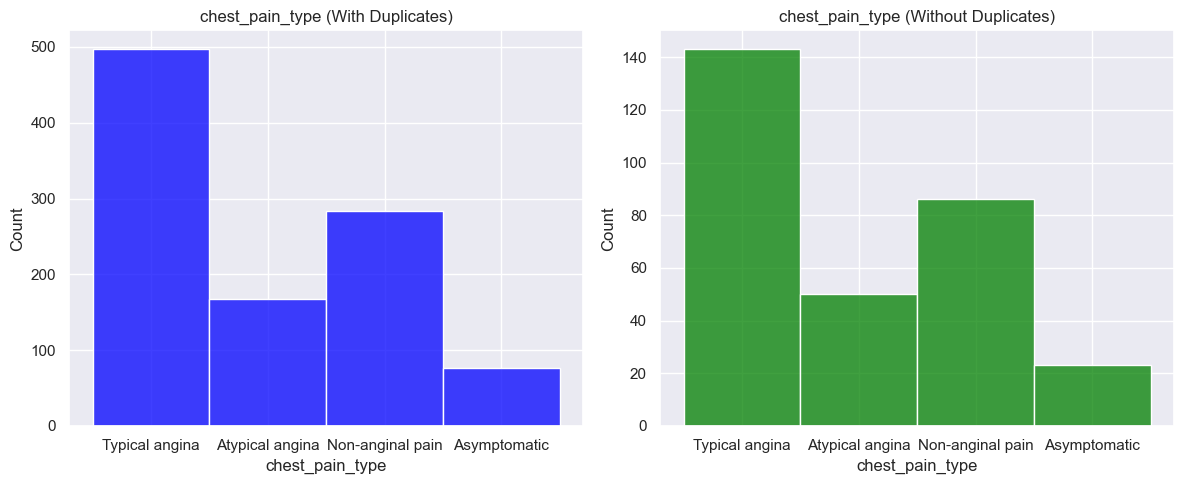

In [37]:
# Plotting histograms for selected numerical columns
num_cols = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak', 'chest_pain_type']
for col in num_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df_raw[col], bins=15, color='blue')
    plt.title(f'{col} (With Duplicates)')
    plt.subplot(1, 2, 2)
    sns.histplot(df_unique[col], bins=15, color='green')
    plt.title(f'{col} (Without Duplicates)')
    plt.tight_layout()
    plt.show()

#### Observações das análises

Os gráficos univariados e estatísticas revelam diferenças mínimas entre os datasets com e sem duplicatas, sugerindo:

1. As duplicatas têm impacto limitado nas distribuições individuais, refletindo uma repetição proporcional dos dados.
2. Mudanças mais expressivas devem surgir nas relações entre variáveis, a serem exploradas na análise bivariada.
   
Além disso, variáveis como Max_heart_rate mostram leve redução na assimetria sem duplicatas, indicando que repetições podem exagerar certos padrões.

## 🔎🔍 4. Análise Bivariada

Na análise bivariada, examinaremos as relações entre variáveis nos datasets com e sem duplicatas, buscando impactos das repetições nos padrões observados.

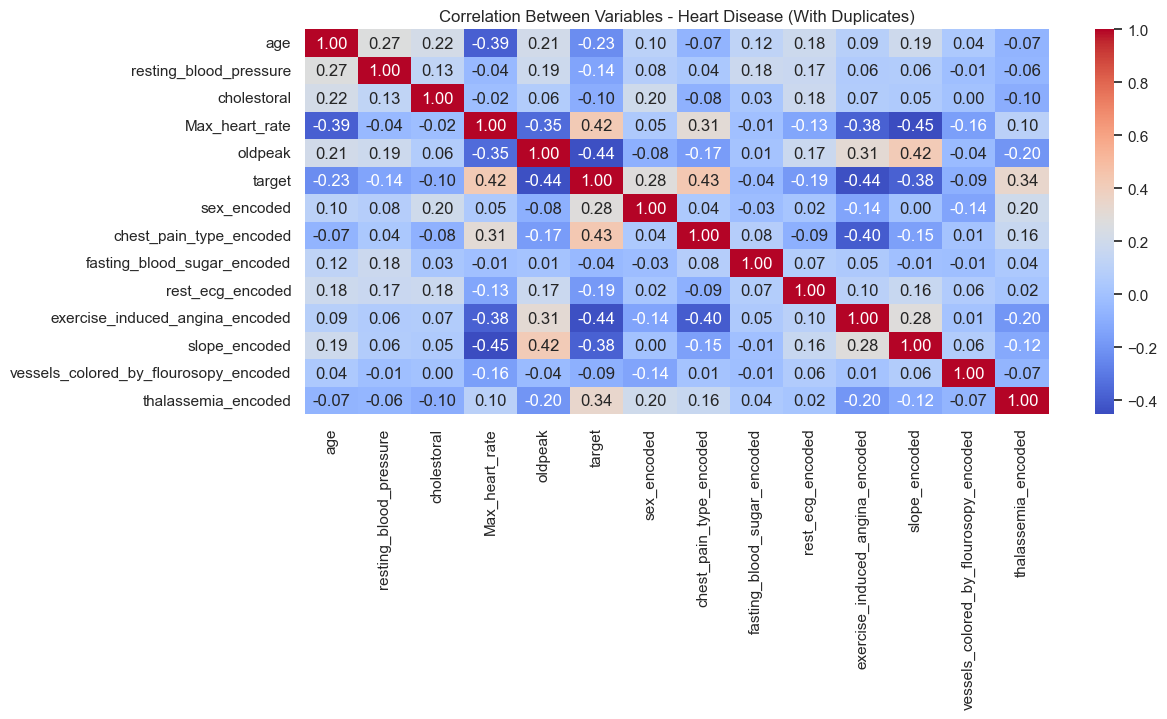

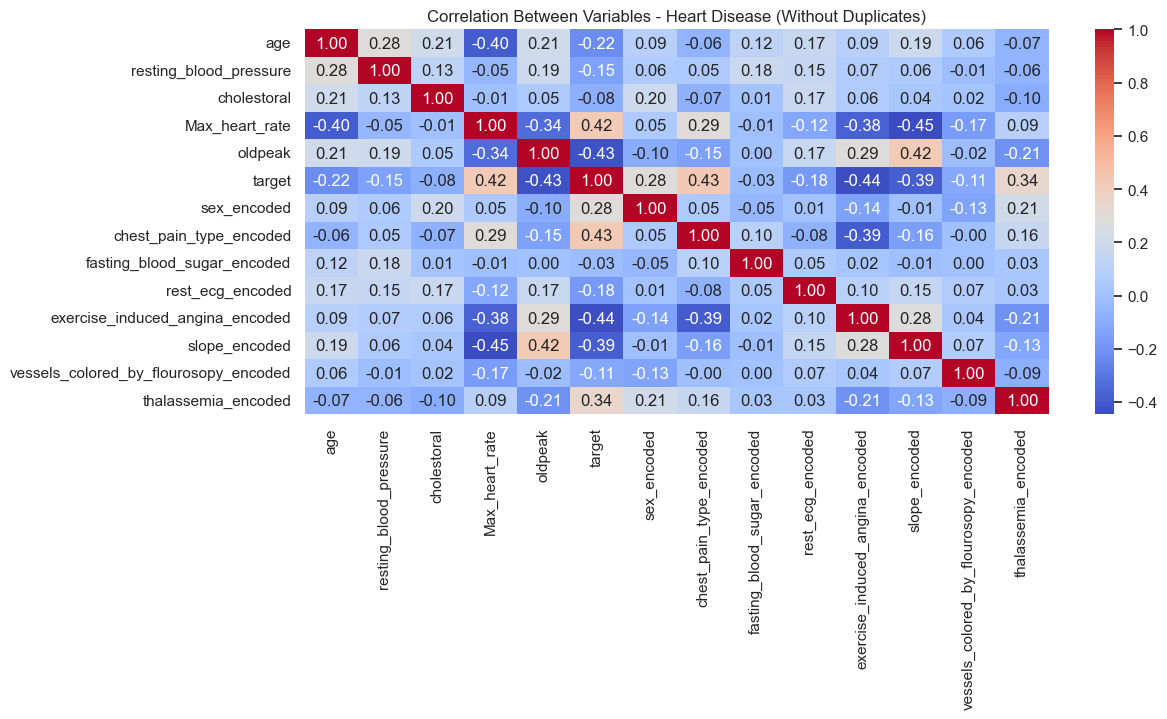

In [42]:
# Calculating correlation matrices for numerical columns
corr_raw = df_raw.select_dtypes(include=['int64', 'float64']).corr()
corr_unique = df_unique.select_dtypes(include=['int64', 'float64']).corr()

# Heatmap for raw data
plt.figure(figsize=(12, 5))
sns.heatmap(corr_raw, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Variables - Heart Disease (With Duplicates)")
plt.show()

# Heatmap for unique data
plt.figure(figsize=(12, 5))
sns.heatmap(corr_unique, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Variables - Heart Disease (Without Duplicates)")
plt.show()

As correlações entre variáveis são baixas, sugerindo que cada uma contribui de forma independente para o target, sendo potencialmente valiosa para modelos de machine learning. Prosseguiremos com gráficos exploratórios e um pairplot.

#### Datasets com e sem duplicatas não serão comparados lado a lado aqui, pois as diferenças são mínimas nesse tipo de visualização; a análise comparativa seguirá nesta seção.

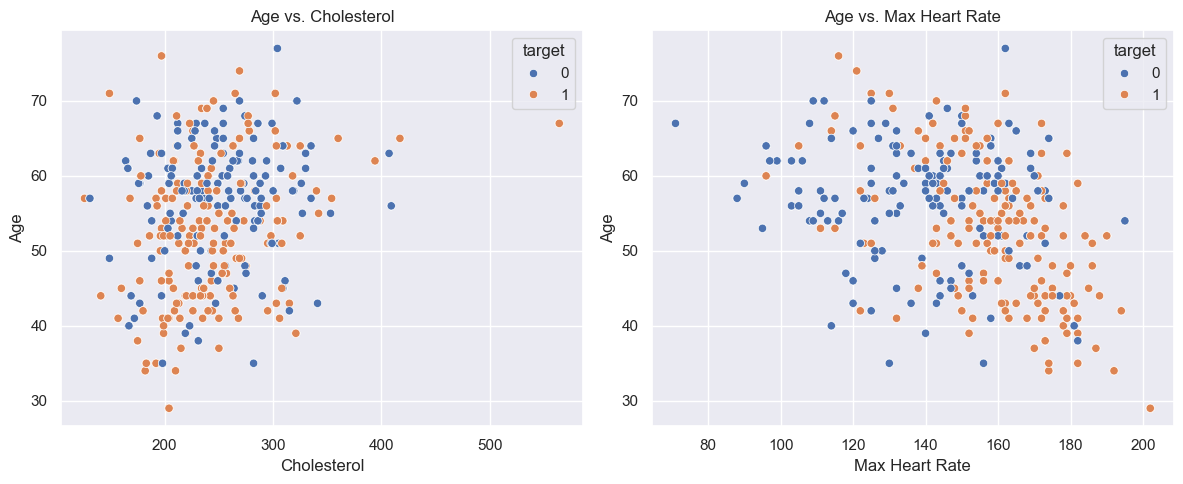

In [44]:
# Visualizing relationships with age using the original (non-encoded) dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot: Cholesterol vs. Age
sns.scatterplot(x='cholestoral', y='age', data=df, hue='target', ax=ax1)
ax1.set_title("Age vs. Cholesterol")
ax1.set_xlabel("Cholesterol")
ax1.set_ylabel("Age")

# Scatter plot: Max Heart Rate vs. Age
sns.scatterplot(x='Max_heart_rate', y='age', data=df, hue='target', ax=ax2)
ax2.set_title("Age vs. Max Heart Rate")
ax2.set_xlabel("Max Heart Rate")
ax2.set_ylabel("Age")

plt.tight_layout()
plt.show()

Os dados exibem alta sobreposição no scatterplot, dificultando conclusões claras. Um pairplot pode revelar relações mais distintas.

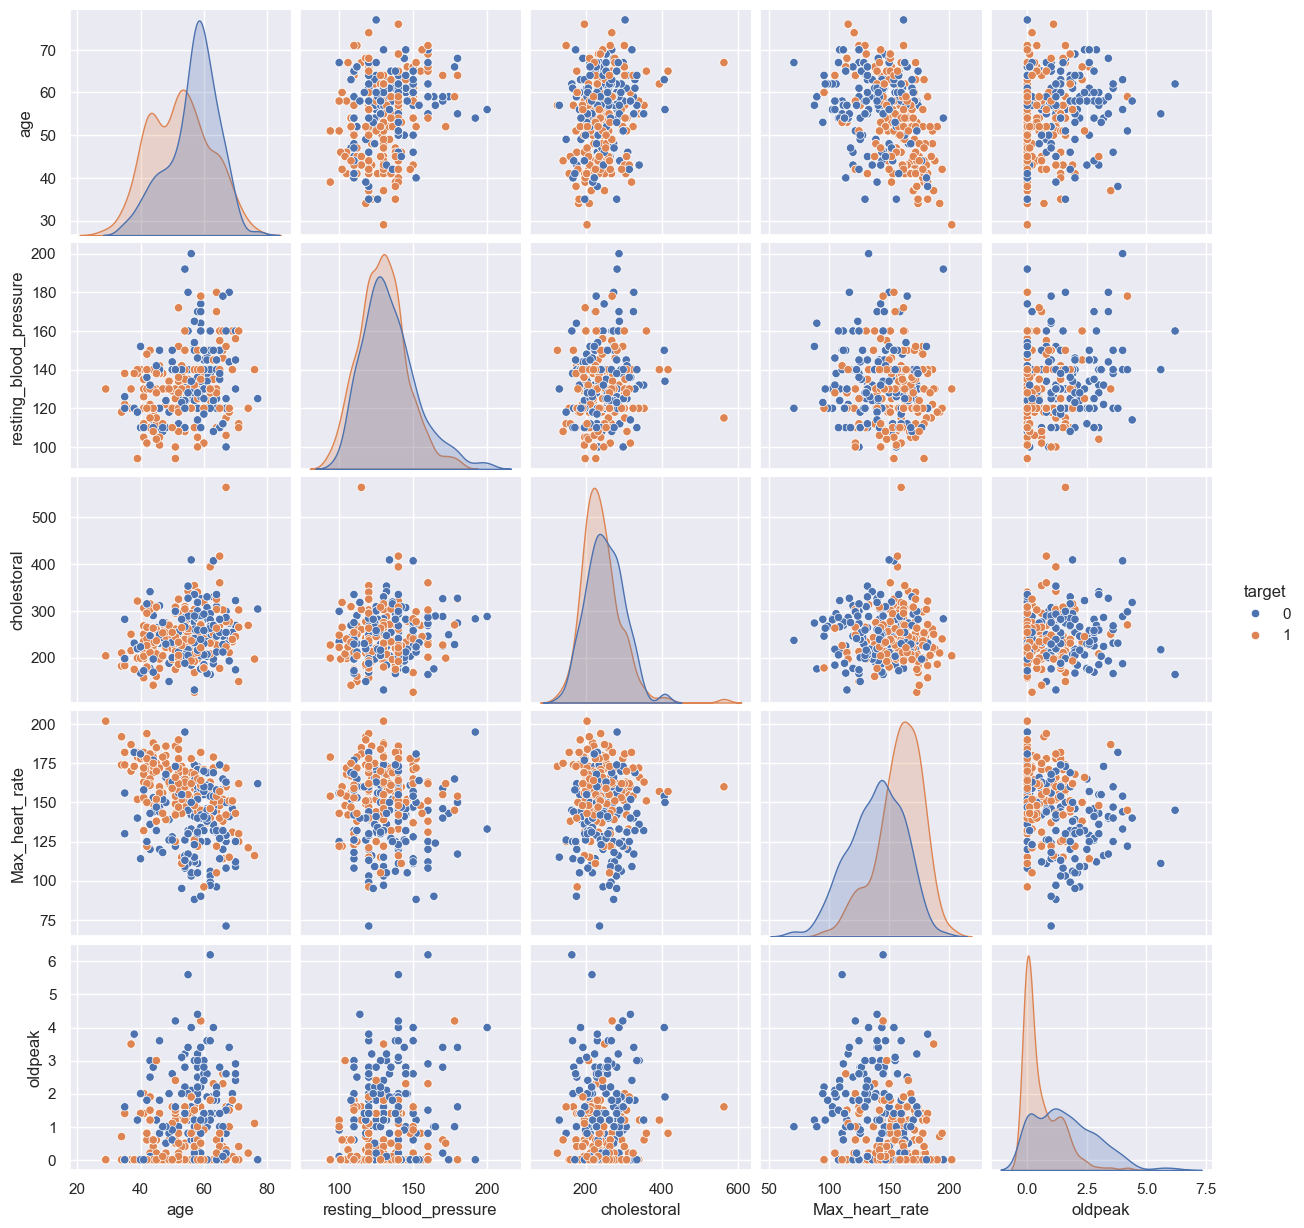

In [46]:
# Creating a pairplot for the original dataset, colored by target
sns.pairplot(data=df, hue='target')
plt.show()

O pairplot indica um padrão sutil: valores baixos de `oldpeak` estão associados a maior prevalência de doença cardíaca (target=1).

Exploraremos combinações específicas a seguir, comparando os datasets com e sem duplicatas para avaliar o impacto das repetições.

In [48]:
# Checking frequent patterns between Age, Cholesterol, and Target
pattern_raw = df_raw.groupby(['age', 'cholestoral', 'target']).size().sort_values(ascending=False).head(5)
pattern_unique = df_unique.groupby(['age', 'cholestoral', 'target']).size().sort_values(ascending=False).head(5)
print("Most Frequent Patterns - With Duplicates:")
print(pattern_raw)
print("Most Frequent Patterns - Without Duplicates:")
print(pattern_unique)

Most Frequent Patterns - With Duplicates:
age  cholestoral  target
38   175          1         8
60   258          0         6
29   204          1         4
58   211          1         4
56   288          0         4
dtype: int64
Most Frequent Patterns - Without Duplicates:
age  cholestoral  target
60   258          0         2
29   204          1         1
59   176          0         1
     239          0         1
     234          1         1
dtype: int64


In [49]:
# Checking frequent patterns between Sex, Age, and Target
pattern_raw = df_raw.groupby(['sex', 'age', 'target']).size().sort_values(ascending=False).head(5)
pattern_unique = df_unique.groupby(['sex', 'age', 'target']).size().sort_values(ascending=False).head(5)
print("Most Frequent Patterns - With Duplicates:")
print(pattern_raw)
print("Most Frequent Patterns - Without Duplicates:")
print(pattern_unique)

Most Frequent Patterns - With Duplicates:
sex   age  target
Male  58   0         36
      57   0         30
      59   0         28
      52   1         25
      60   0         24
dtype: int64
Most Frequent Patterns - Without Duplicates:
sex   age  target
Male  58   0         10
      52   1          8
      57   0          8
      59   0          8
      60   0          7
dtype: int64


In [50]:
# Checking frequent patterns between Chest Pain Type and Target
pattern_raw = df_raw.groupby(['chest_pain_type', 'target']).size().sort_values(ascending=False).head(10)
pattern_unique = df_unique.groupby(['chest_pain_type', 'target']).size().sort_values(ascending=False).head(10)
print("Most Frequent Patterns - With Duplicates:")
print(pattern_raw)
print("Most Frequent Patterns - Without Duplicates:")
print(pattern_unique)

Most Frequent Patterns - With Duplicates:
chest_pain_type   target
Typical angina    0         375
Non-anginal pain  1         219
Atypical angina   1         134
Typical angina    1         122
Non-anginal pain  0          65
Asymptomatic      1          51
Atypical angina   0          33
Asymptomatic      0          26
dtype: int64
Most Frequent Patterns - Without Duplicates:
chest_pain_type   target
Typical angina    0         104
Non-anginal pain  1          68
Atypical angina   1          41
Typical angina    1          39
Non-anginal pain  0          18
Asymptomatic      1          16
Atypical angina   0           9
Asymptomatic      0           7
dtype: int64


In [51]:
# Checking frequent patterns between Oldpeak, Exercise-Induced Angina, and Target
pattern_raw = df_raw.groupby(['oldpeak', 'exercise_induced_angina', 'target']).size().sort_values(ascending=False).head(5)
pattern_unique = df_unique.groupby(['oldpeak', 'exercise_induced_angina', 'target']).size().sort_values(ascending=False).head(5)
print("Most Frequent Patterns - With Duplicates:")
print(pattern_raw)
print("Most Frequent Patterns - Without Duplicates:")
print(pattern_unique)

Most Frequent Patterns - With Duplicates:
oldpeak  exercise_induced_angina  target
0.0      No                       1         214
                                  0          54
         Yes                      0          33
                                  1          28
0.6      No                       1          27
dtype: int64
Most Frequent Patterns - Without Duplicates:
oldpeak  exercise_induced_angina  target
0.0      No                       1         64
                                  0         15
         Yes                      0         10
                                  1          9
0.6      No                       1          8
dtype: int64


A análise bivariada revelou correlações fracas e dados bem misturados em visualizações como heatmaps e pairplots, com diferenças mínimas entre datasets com e sem duplicatas. 

Padrões mais claros emergiram apenas em análises específicas de subgrupos, como os tipos de dor no peito. Detalhes e implicações seguem na seção de insights.

## 👨🏻‍🏫 5. Insights

Durante a exploração do dataset, diversos padrões emergiram:

1. As duplicatas (>70% do dataset) são proporcionais, com impacto mínimo nas distribuições univariadas e correlações bivariadas (variações ~0.02), sugerindo repetições uniformes que não alteram significativamente os dados isolados.
2. Visualizações como scatterplots e pairplots mostram alta sobreposição, indicando que relações entre pares de variáveis são sutis e difíceis de detectar sem combinações mais amplas.
3. Na análise univariada, variáveis como `Max_heart_rate` apresentam leve redução de assimetria sem duplicatas, sugerindo que repetições podem exagerar certos padrões.
4. A proporção de homens cai ligeiramente de 70% (com duplicatas) para 68% (sem), indicando um leve exagero nas repetições.
5. Na bivariada, `oldpeak` baixo está associado a maior prevalência de target=1 (doença cardíaca), um padrão sutil visível no pairplot.
6. Especificamente, `typical angina` tem 3 vezes mais chance de ser inofensiva (target=0) do que indicar doença cardíaca, enquanto `non-anginal pain` possui mais de 3 vezes maior probabilidade de apontar target=1, destacando influências claras do tipo de dor no peito.

Fora esses, outros groupbys não revelaram padrões práticos ou acionáveis, independentemente do dataset.

## 📊 6. Conclusões

Esta Análise Exploratória de Dados no dataset de fatores cardíacos revelou padrões sutis, como a associação de `oldpeak` baixo com maior prevalência de doença cardíaca (target=1) e a influência distinta dos tipos de dor no peito: `typical angina` é 3 vezes mais propensa a ser inofensiva, enquanto `non-anginal pain` tem mais de 3 vezes maior chance de indicar doença. 

As duplicatas (>70%) mostraram-se proporcionais, com impacto mínimo nas distribuições univariadas e bivariadas (variações ~0.02), sugerindo repetições uniformes. 

A baixa correlação entre variáveis indica independência, mas a alta mistura nos dados em visualizações como pairplots aponta que relações simples não bastam. 

Apesar disso, a separação de classes em subgrupos específicos sugere potencial para modelos de Machine Learning, que podem alcançar alta precisão ao combinar múltiplas variáveis.